#Assignment 5
By: Sean Rock

###Problem 1: Optimum Design of an I-beam
In building construction, horizontal structural components that bear loads perpendicular to their longitudinal direction are typically beams. To support the combined weight of stacked walls and transfer the support load, larger and heavier beams called transfer beams are often used.

The main goal of the problem is to use the GA package in Google Colab  (R) to perform multi-objective engineering design optimization for a load-bearing I-beam.


In [1]:
# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘Rcpp’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’




In [3]:
# Loading the needed libraries

library(GA)
library(plotly)

Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




The general optimization goal for this I-beam problem is to minimize F=[f1,f2]T where the cross section area (f1) and the static deflection (f2) of the I-beam are defined as:

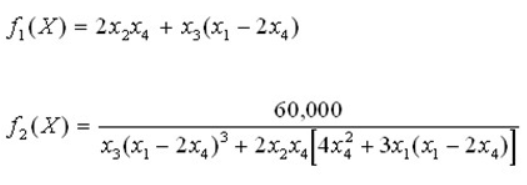

The two objectives are conflicting in nature since minimization of f1 will result in maximization of f2 and vice versa.

The geometric side constraints are: 10 ≤ X1 ≤ 80, 10 ≤ X2 ≤ 50, 0.9 ≤ X3 ≤ 5.0, 0.9 ≤ X4 ≤ 5.0.

The weighted approach where the two objective functions are converted into a single one with the below equation is used for the multi-objective optimization: F = a•f1 + b•f2.

Note that [a,b] is the weight vector and you can use any values as long as a+b=1 (a and b are the degrees of importance associated with f1 and f2, respectively).


In [42]:
#evenly weighted function
func1a <- function(x1, x2, x3, x4)
{
  .5*(((2*x2)*x4)+(x3*(x1-(2*x4))))+(.5)*(60000/((x3*(x1-2*x4)^3) +2*x2*x4*((4*x4^2)+3*x1*(x1+(-2*x4)))))
}
#f2 prioritized function
func1b <- function(x1, x2, x3, x4)
{
  .25*(((2*x2)*x4)+(x3*(x1-(2*x4))))+(.75)*(60000/((x3*(x1-2*x4)^3) +2*x2*x4*((4*x4^2)+3*x1*(x1+(-2*x4)))))
}
#f1 prioritized function
func1c <- function(x1, x2, x3, x4)
{
  .75*(((2*x2)*x4)+(x3*(x1-(2*x4))))+(.25)*(60000/((x3*(x1-2*x4)^3) +2*x2*x4*((4*x4^2)+3*x1*(x1+(-2*x4)))))
}
#f1 only function
func2 <- function(x1, x2, x3, x4)
{
  ((2*x2)*x4)+(x3*(x1-(2*x4)))
}
#f2 only function
func3 <- function(x1, x2, x3, x4)
{
  60000/(x3*(x1-2*x4)^3 +2*x2*x4*(4*x4^2+3*x1*(x1-2*x4)))
}

# Parameters constraints
x1 <- seq(10, 80, by = 0.5)
x2 <- seq(10, 50, by = 0.5)
x4 <- x3 <- seq(.9, 5, by = 0.1)


I first ran the two functions individually to see there respective floors. F1 minimum value is significantly higher than F2. As a result, minimizing F1 function yields the best overall results unless the coefficients significantly favor F2.

F1 is minimized by the variables being as low as possible while F2 is minimized by the variables being as high as possible.

I ran three separate GAs for the  multi-objective optimization using different coefficients on the objectives. The function that gave more weight to F1 saw the values near there minimum. The other two functions that gave more weight to F2 saw proportional increases to the X1 values of the solutions. The total cost also decreased the lower the F1 coefficient was.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  100 
Number of generations =  1000 
Elitism               =  5 
Crossover probability =  0.75 
Mutation probability  =  0.02 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 1000 
Fitness function value = -26.38804 
Solution = 
           x1       x2        x3        x4
[1,] 10.51311 10.14052 0.9186692 0.9070833

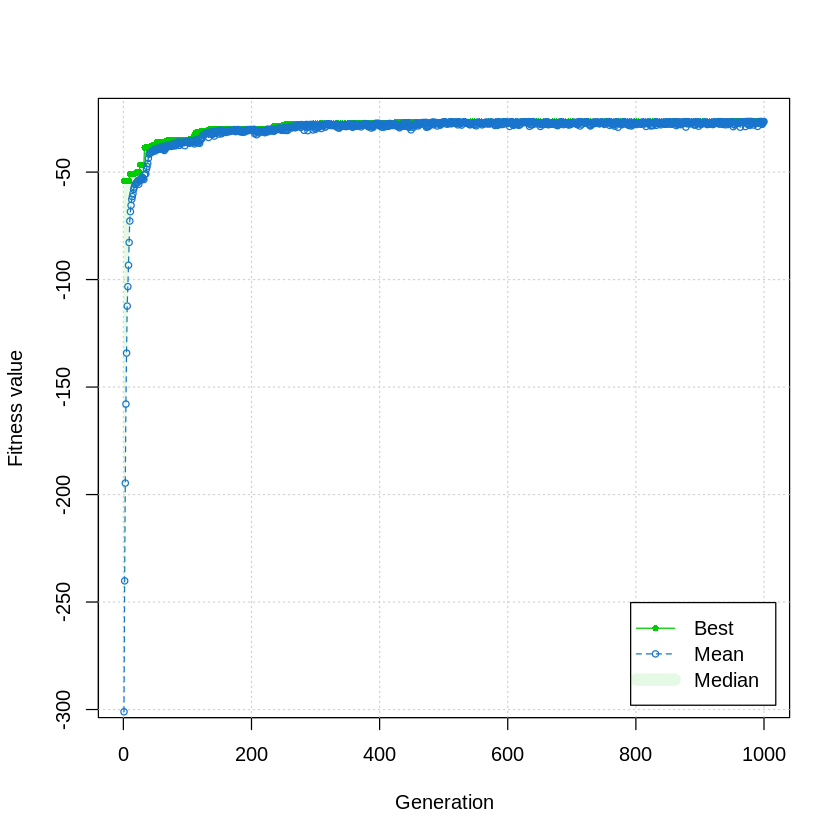

In [8]:
# Multiply functions by -1 to minimize

# f1 single objective optimization
options(warn = 1)
GA <- ga(type = "real-valued",
         fitness =  function(x) -func2(x[1], x[2],x[3],x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5, 5),
         popSize = 100, maxiter = 1000, run = 1000, pcrossover = 0.75,
         pmutation = 0.02)

summary(GA)

plot(GA)
options(warn = 0)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  100 
Number of generations =  1000 
Elitism               =  5 
Crossover probability =  0.75 
Mutation probability  =  0.02 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 1000 
Fitness function value = -0.005982044 
Solution = 
           x1       x2       x3       x4
[1,] 79.64601 49.92715 4.966625 4.995289

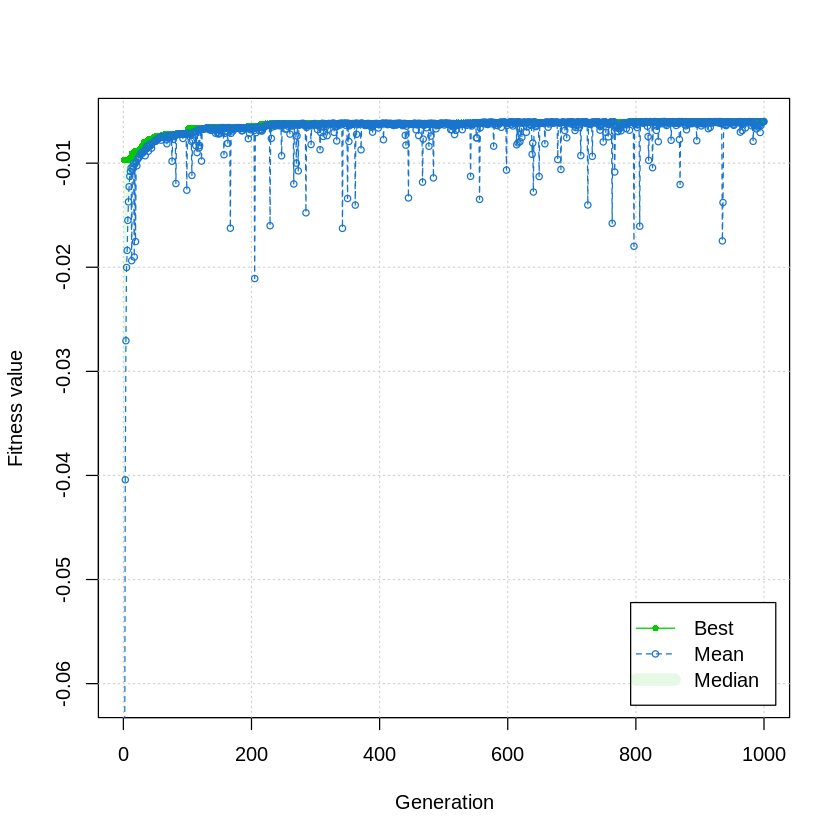

In [ ]:
# Multiply functions by -1 to minimize

# f2 single objective optimization
options(warn = 1)
GA <- ga(type = "real-valued",
         fitness =  function(x) -func3(x[1], x[2],x[3],x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5, 5),
         popSize = 100, maxiter = 1000, run = 1000, pcrossover = 0.75,
         pmutation = 0.02)

summary(GA)

plot(GA)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  100 
Number of generations =  1000 
Elitism               =  5 
Crossover probability =  0.75 
Mutation probability  =  0.02 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 1000 
Fitness function value = -17.47756 
Solution = 
           x1       x2        x3        x4
[1,] 13.89695 10.19204 0.9090413 0.9081961

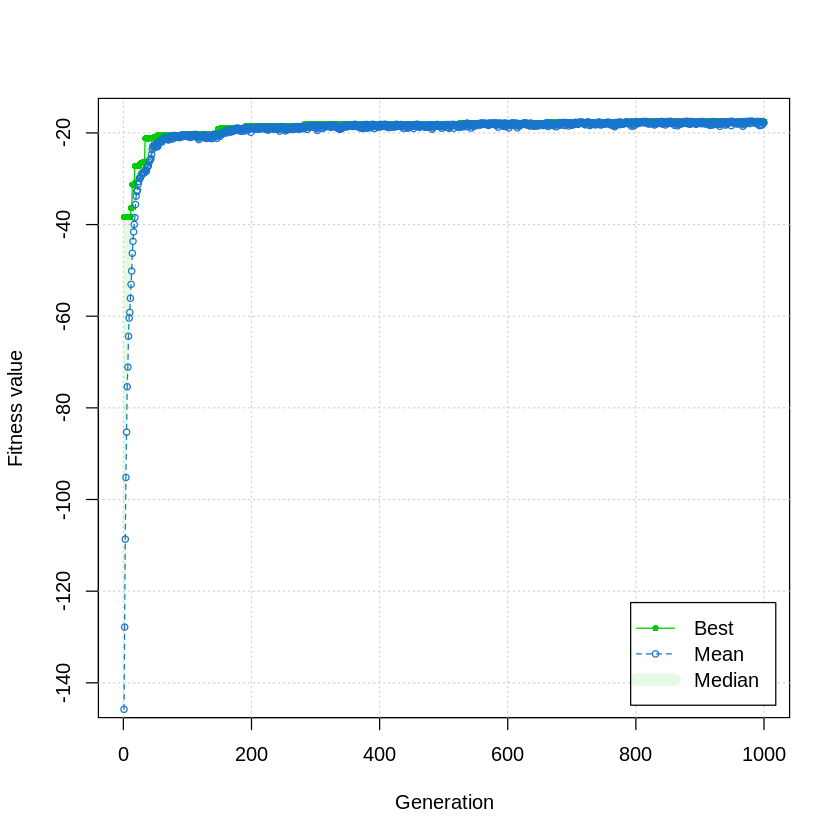

In [43]:
# Multiply functions by -1 to minimize

# combined multi-objective optimization (evenly weighted)
GA <- ga(type = "real-valued",
         fitness =  function(x) -func1a(x[1], x[2],x[3],x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5, 5),
         popSize = 100, maxiter = 1000, run = 1000, pcrossover = 0.75,
         pmutation = 0.02)

summary(GA)

plot(GA)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  100 
Number of generations =  1000 
Elitism               =  5 
Crossover probability =  0.75 
Mutation probability  =  0.02 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 1000 
Fitness function value = -10.4953 
Solution = 
          x1       x2        x3        x4
[1,] 19.4384 10.12728 0.9018982 0.9205194

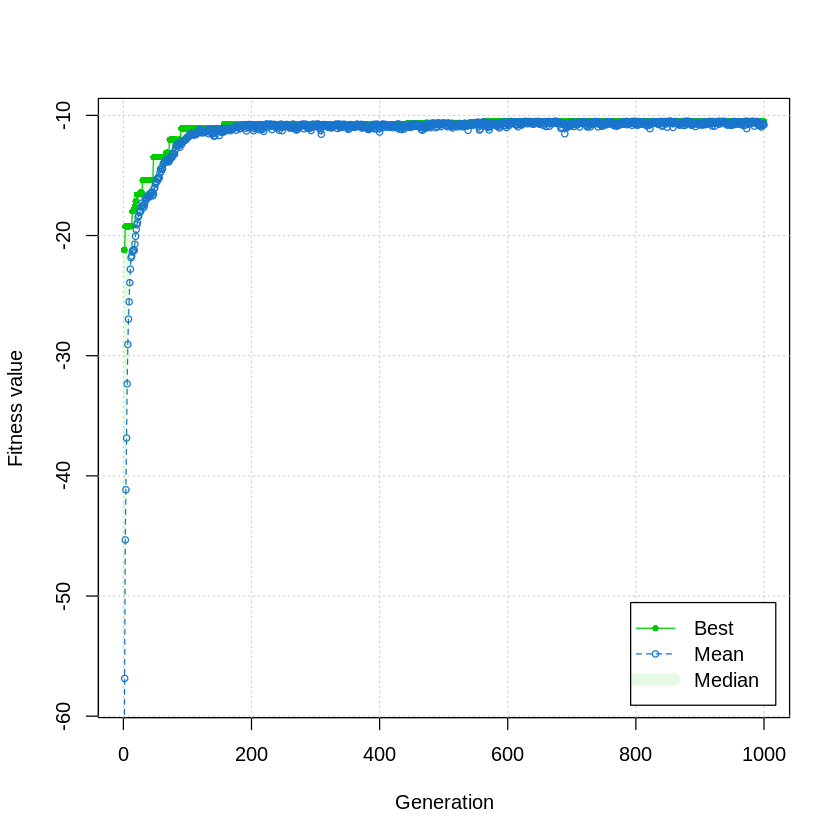

In [44]:
# Multiply functions by -1 to minimize

# combined multi-objective optimization (favoring F2)
GA <- ga(type = "real-valued",
         fitness =  function(x) -func1b(x[1], x[2],x[3],x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5, 5),
         popSize = 100, maxiter = 1000, run = 1000, pcrossover = 0.75,
         pmutation = 0.02)

summary(GA)

plot(GA)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  100 
Number of generations =  1000 
Elitism               =  5 
Crossover probability =  0.75 
Mutation probability  =  0.02 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 1000 
Fitness function value = -22.22562 
Solution = 
           x1       x2        x3        x4
[1,] 10.38669 10.04948 0.9084891 0.9057927

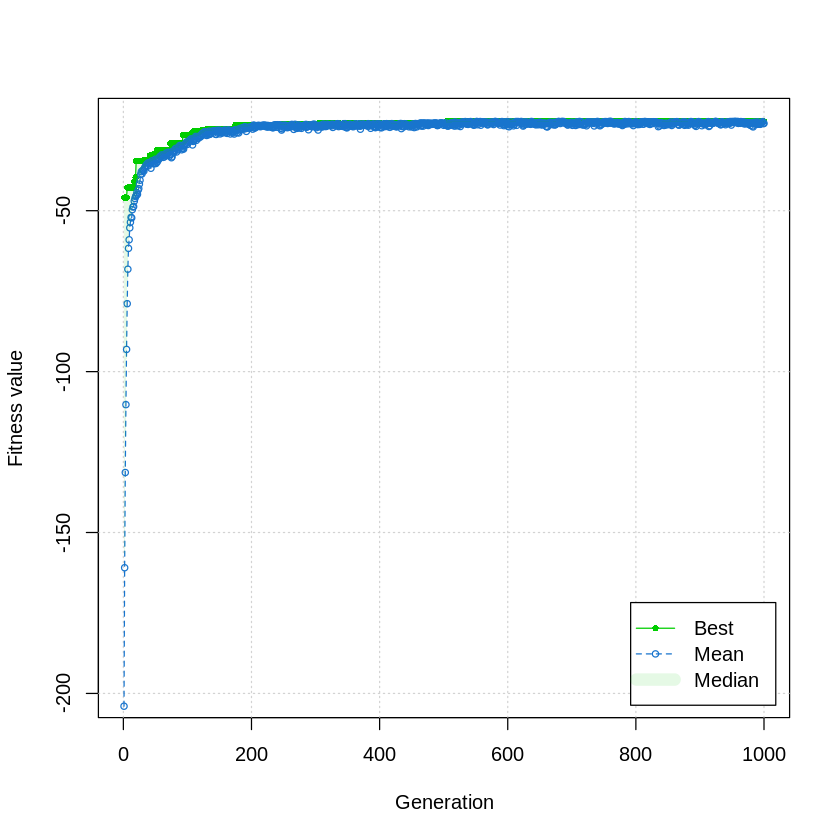

In [45]:
# Multiply functions by -1 to minimize

# combined multi-objective optimization     (favoring F1)
GA <- ga(type = "real-valued",
         fitness =  function(x) -func1c(x[1], x[2],x[3],x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5, 5),
         popSize = 100, maxiter = 1000, run = 1000, pcrossover = 0.75,
         pmutation = 0.02)

summary(GA)

plot(GA)

## Problem 2 - Extra Credit: Optimization for Crashworthiness Design of Vehicles
The vehicle crashworthiness problem is a three-objective problem where the crash safety level of a vehicle is optimized. A higher safety level means how well a vehicle can protect the occupants from the effects of a frontal accident.

There are 5 decision variables (design parameters) that represent the thickness of reinforced members (thin-walled components of the automotive body Links to an external site.) around the car front.

Variable Constraints:

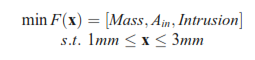

Where the three objective functions to evaluate are:

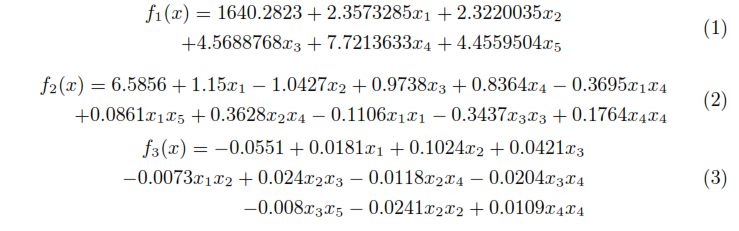

(1) For the consideration of lightweight, the mass of the vehicle is set as the first design objective.

(2) To take into account the worst scenario of acceleration-induced biomechanical damage of occupants, an integration of collision acceleration  in the full frontal crash is the second objective.

(3) To consider the most severe mechanical injury, the toe board intrusion in the offset-frontal crash is regarded as the third objective.

In [34]:
#Function definitions with different coefficient values for
# f1 f2 and f3 (adding up to exactly 1)

# evenly weighted function
func4 <- function(x1, x2, x3, x4, x5)
{
    0.33*(1640.2823+2.3573285*x1+2.3220035*x2+4.5688768*x3+7.7213633*x4+4.4559504*x5)+
      0.34 * (6.5856+1.15*x1-1.0427*x2+0.9738*x3+0.8364*x4+0.3695*x1*x4+0.0861*x1*x5+0.3628*x2*x4-0.1106*x1*x1-0.3437*x3*x3+0.1764*x5*x5)+
        0.33*(0.0181*x1+0.1024*x2+0.0421*x3+ -0.0073*x1*x2+0.024*x2*x3-0.0118*x2*x4-0.0204*x3*x4+ -0.008*x3*x5-0.0241*x2*x2+0.0109*x4*x4-0.0551)
}

#f1 prioritized function
func4a <- function(x1, x2, x3, x4, x5)
{
    0.95*(1640.2823+2.3573285*x1+2.3220035*x2+4.5688768*x3+7.7213633*x4+4.4559504*x5)+
      0.02 * (6.5856+1.15*x1-1.0427*x2+0.9738*x3+0.8364*x4+0.3695*x1*x4+0.0861*x1*x5+0.3628*x2*x4-0.1106*x1*x1-0.3437*x3*x3+0.1764*x5*x5)+
        0.03*(0.0181*x1+0.1024*x2+0.0421*x3+ -0.0073*x1*x2+0.024*x2*x3-0.0118*x2*x4-0.0204*x3*x4+ -0.008*x3*x5-0.0241*x2*x2+0.0109*x4*x4-0.0551)
}
#f2 prioritized function
func4b <- function(x1, x2, x3, x4, x5)
{
    0.050*(1640.2823+2.3573285*x1+2.3220035*x2+4.5688768*x3+7.7213633*x4+4.4559504*x5)+
      0.99 * (6.5856+1.15*x1-1.0427*x2+0.9738*x3+0.8364*x4+0.3695*x1*x4+0.0861*x1*x5+0.3628*x2*x4-0.1106*x1*x1-0.3437*x3*x3+0.1764*x5*x5)+
        0.005*(0.0181*x1+0.1024*x2+0.0421*x3+ -0.0073*x1*x2+0.024*x2*x3-0.0118*x2*x4-0.0204*x3*x4+ -0.008*x3*x5-0.0241*x2*x2+0.0109*x4*x4-0.0551)
}
#f3 prioritized function
func4c <- function(x1, x2, x3, x4, x5)
{
    0.00005*(1640.2823+2.3573285*x1+2.3220035*x2+4.5688768*x3+7.7213633*x4+4.4559504*x5)+
      0.00005 * (6.5856+1.15*x1-1.0427*x2+0.9738*x3+0.8364*x4+0.3695*x1*x4+0.0861*x1*x5+0.3628*x2*x4-0.1106*x1*x1-0.3437*x3*x3+0.1764*x5*x5)+
        0.9999*(0.0181*x1+0.1024*x2+0.0421*x3+ -0.0073*x1*x2+0.024*x2*x3-0.0118*x2*x4-0.0204*x3*x4+ -0.008*x3*x5-0.0241*x2*x2+0.0109*x4*x4-0.0551)
}


# Parameters constraints

x5<-x4 <- x3 <- x2<- x1<- seq(1, 3, by = 0.1)

Running the above variations of F(x) yielded illustrative results. I ran four variations of the function. I prioritized each variable individually in three of them. This revealed that F1 is at its minimum when all the variables are about 1. F2 is minimized when x2 and x3 are around 3 and the other variables are close to 1. F3 has its lowest results when all variables are about 3 except x3. These GA executions also revealed that F1 minimum value is significantly higher than F2 and F3.

As a result, the fourth variation that I ran (an evenly weighted function) attempts to minimize f1 as much as possible since it adds the most cost. It did this by selection solutions where the variables are all nearly equal to 1.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  100 
Number of generations =  1000 
Elitism               =  5 
Crossover probability =  0.75 
Mutation probability  =  0.02 
Search domain = 
      x1 x2 x3 x4 x5
lower  1  1  1  1  1
upper  3  3  3  3  3

GA results: 
Iterations             = 1000 
Fitness function value = -551.4847 
Solution = 
           x1       x2       x3       x4       x5
[1,] 1.000422 1.006547 1.002032 1.003536 1.002869

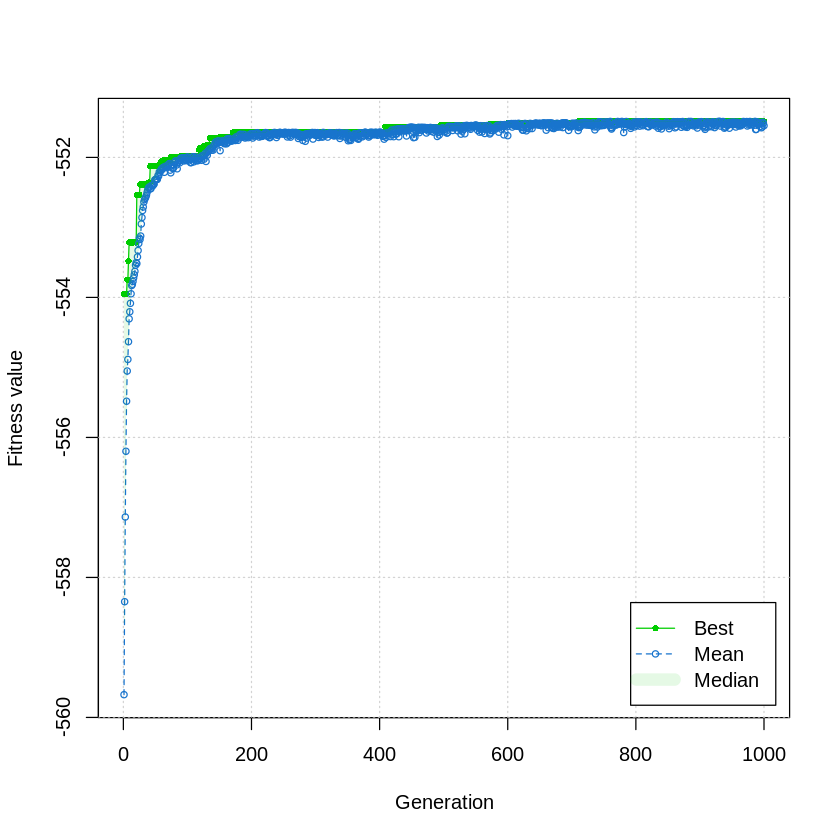

In [35]:
# Multiply functions by -1 to minimize

# combined multi-objective optimization
GA <- ga(type = "real-valued",
         fitness =  function(x) -func4(x[1], x[2],x[3],x[4], x[5]),
         lower = c(1, 1, 1, 1, 1), upper = c(3, 3, 3, 3, 3),
         popSize = 100, maxiter = 1000, run = 1000, pcrossover = 0.75,
         pmutation = 0.02)

summary(GA)

plot(GA)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  100 
Number of generations =  1000 
Elitism               =  5 
Crossover probability =  0.75 
Mutation probability  =  0.02 
Search domain = 
      x1 x2 x3 x4 x5
lower  1  1  1  1  1
upper  3  3  3  3  3

GA results: 
Iterations             = 1000 
Fitness function value = -1578.904 
Solution = 
           x1       x2       x3       x4       x5
[1,] 1.016001 1.006631 1.001221 1.002233 1.006162

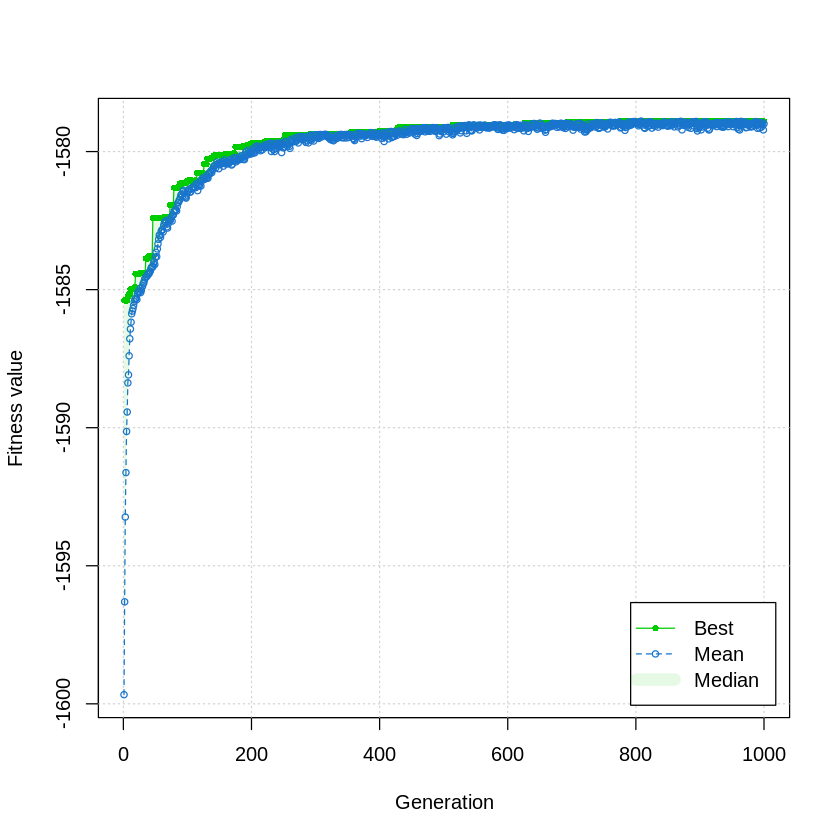

In [36]:
# Multiply functions by -1 to minimize

# combined multi-objective optimization
GA <- ga(type = "real-valued",
         fitness =  function(x) -func4a(x[1], x[2],x[3],x[4], x[5]),
         lower = c(1, 1, 1, 1, 1), upper = c(3, 3, 3, 3, 3),
         popSize = 100, maxiter = 1000, run = 1000, pcrossover = 0.75,
         pmutation = 0.02)

summary(GA)

plot(GA)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  100 
Number of generations =  1000 
Elitism               =  5 
Crossover probability =  0.75 
Mutation probability  =  0.02 
Search domain = 
      x1 x2 x3 x4 x5
lower  1  1  1  1  1
upper  3  3  3  3  3

GA results: 
Iterations             = 1000 
Fitness function value = -90.71148 
Solution = 
           x1    x2       x3       x4       x5
[1,] 1.011489 2.993 2.977706 1.026244 1.019932

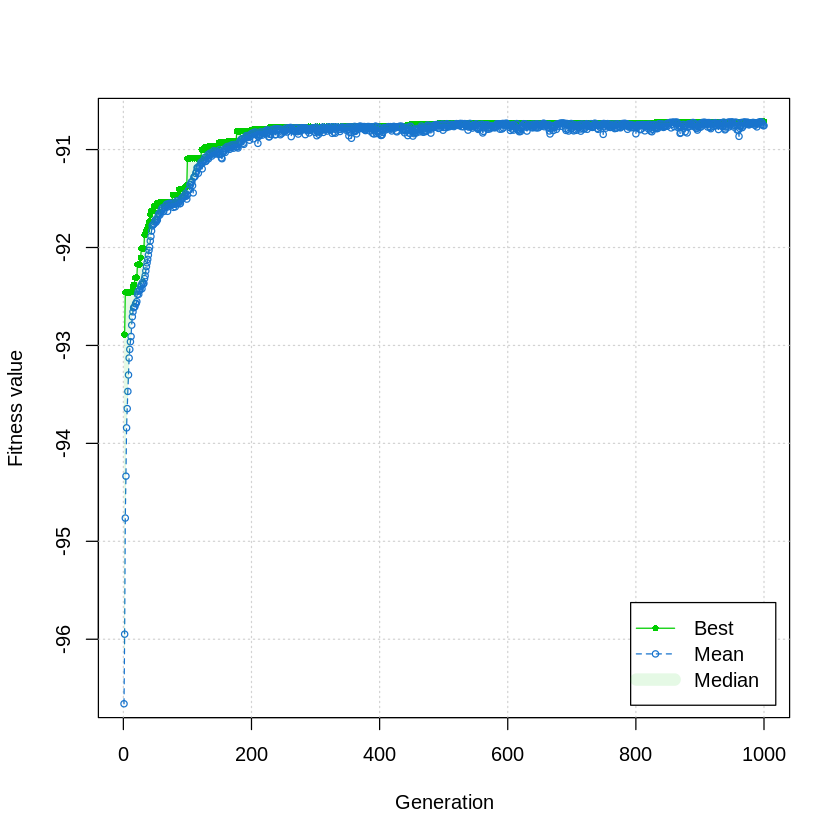

In [37]:
# Multiply functions by -1 to minimize

# combined multi-objective optimization
GA <- ga(type = "real-valued",
         fitness =  function(x) -func4b(x[1], x[2],x[3],x[4], x[5]),
         lower = c(1, 1, 1, 1, 1), upper = c(3, 3, 3, 3, 3),
         popSize = 100, maxiter = 1000, run = 1000, pcrossover = 0.75,
         pmutation = 0.02)

summary(GA)

plot(GA)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  100 
Number of generations =  1000 
Elitism               =  5 
Crossover probability =  0.75 
Mutation probability  =  0.02 
Search domain = 
      x1 x2 x3 x4 x5
lower  1  1  1  1  1
upper  3  3  3  3  3

GA results: 
Iterations             = 1000 
Fitness function value = -0.1289793 
Solution = 
           x1      x2       x3       x4       x5
[1,] 2.995002 2.98798 1.004117 2.531454 2.992575

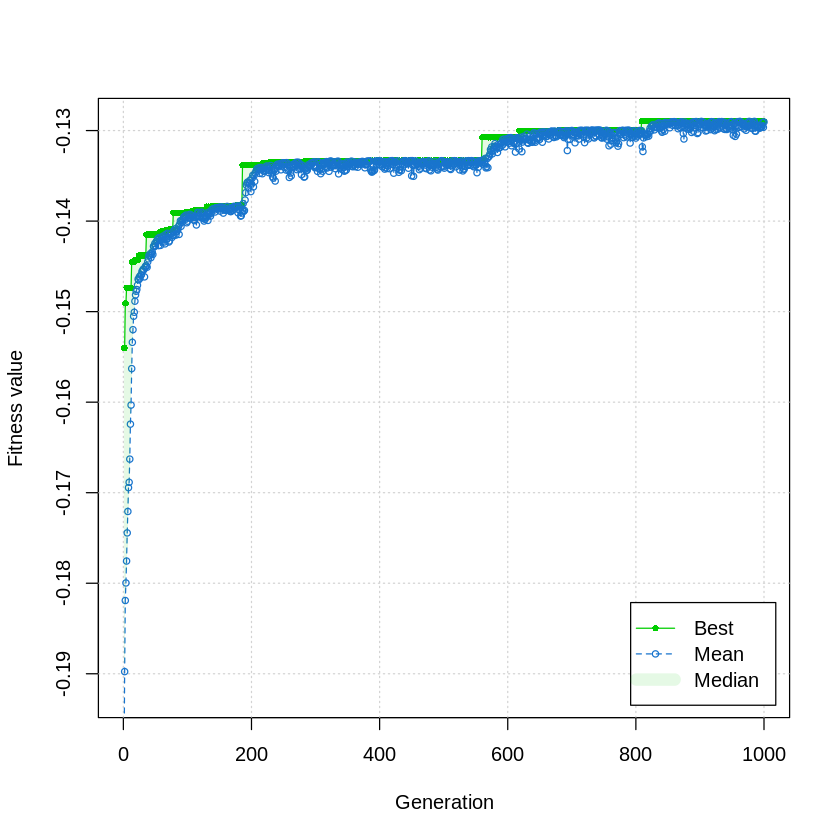

In [38]:
# Multiply functions by -1 to minimize

# combined multi-objective optimization
GA <- ga(type = "real-valued",
         fitness =  function(x) -func4c(x[1], x[2],x[3],x[4], x[5]),
         lower = c(1, 1, 1, 1, 1), upper = c(3, 3, 3, 3, 3),
         popSize = 100, maxiter = 1000, run = 1000, pcrossover = 0.75,
         pmutation = 0.02)

summary(GA)

plot(GA)